In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model (nn.Module):
    
    def __init__ (self,in_features=4,h1=8,h2=9,out_features=3):
        #how many layers
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
        #Input Layer(4 feature)
        #output should be have 3 classes only
        
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Data/iris.csv')

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [9]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr =0.01)

In [12]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [13]:
epochs =100
losses = []

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred,y_train)

    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#Recall that when initializing optimizer you explicitly tell 
#it what parameters (tensors) of the model it should be updating.
#The gradients are "stored" by the tensors themselves (they have a grad
#and a requires_grad attributes) once you call backward() on the loss. 
#After computing the gradients for all tensors in the model, calling optimizer.step() 
#makes the optimizer iterate over all parameters (tensors) it is supposed to update
#and use their internally stored grad to update their values

epoch:  1  loss: 1.11666143
epoch: 11  loss: 0.91846633
epoch: 21  loss: 0.76790810
epoch: 31  loss: 0.58973622
epoch: 41  loss: 0.38459590
epoch: 51  loss: 0.24147534
epoch: 61  loss: 0.14345464
epoch: 71  loss: 0.09802608
epoch: 81  loss: 0.08006152
epoch: 91  loss: 0.07168321


Text(0, 0.5, 'Epochs')

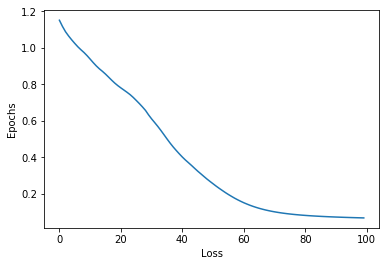

In [17]:
plt.plot(range(epochs),losses)
plt.xlabel('Loss')
plt.ylabel('Epochs')

In [19]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [20]:
loss

tensor(0.0581)

In [21]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

In [22]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [23]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.05809743
